# Finding optima in n dimensions

Here we demonstrate the computation of minima and maxima with the [BFGS](https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm) algorithm.

This uses the function animation procedure as shown [here](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/). 

In [1]:
import numpy as np
from scipy.optimize import fmin_bfgs
import matplotlib.pyplot as plt

## Define the function and its derivative

Function is

$$f(x,y) = x^2 + 2y^2 + 0.3 \cos(3\pi x) + 0.4 \cos(4\pi y)$$

so the derivative is

$$\vec{\nabla} f = \left[ 2x-0.9\pi\sin(3\pi x), 4y-1.6\pi\sin(4\pi y) \right]$$

In [2]:

def f (r) :
    x=r[0]
    y=r[1]
    return x*x + 2 * y*y + 0.3 * np.cos(3 * np.pi * x) + 0.4 * np.cos(4 * np.pi * y)

def df(r) :
    x=r[0]
    y=r[1]
    u = 2 * x - 0.9 * np.pi * np.sin(3 * np.pi * x)
    v = 4 * y - 1.6 * np.pi * np.sin(4 * np.pi * y)
    return np.array([u,v])


## Draw the function and its gradient

Text(0, 0.5, 'y')

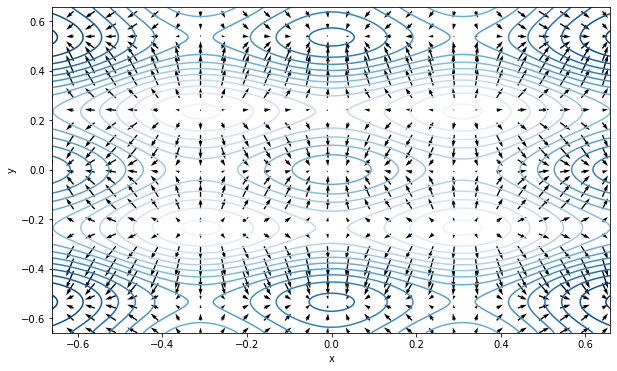

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

x1=-0.66
x2=0.66
y1=-0.66
y2=0.66
nskip=50
delta = 0.001
x = np.arange(x1,x2,delta)
y = np.arange(y1,y2,delta)
X,Y = np.meshgrid(x,y)
Z = f( np.array([X,Y]) ) 
U,V = df( np.array([X,Y]) )
ax.contour(X, Y, Z, 20, cmap='Blues')
#plt.colorbar().set_label("f(x,y)")
ax.quiver(X[::nskip,::nskip],Y[::nskip,::nskip], U[::nskip,::nskip], V[::nskip,::nskip])
ax.set_xlabel("x")
ax.set_ylabel("y")


## Run BFGS



Set initial conditions here

In [4]:
p = np.array([ 0.5, 0.01 ])

Getting the path of the BFGS algorithm requires us to write a "callback" function for each step to append the position to an array called `path`. 



In [5]:

def make_minimize_cb(path=[]):    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))
    return minimize_cb

Actually run the simulation. Print results. 

In [6]:

path = [p]
gtol = 1e-6
res = fmin_bfgs(f=f, fprime=df,x0=p, gtol=gtol, callback=make_minimize_cb(path))
print (res)
path = np.array(path).T
print(path)
print(path.shape)

Optimization terminated successfully.
         Current function value: -0.479140
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
[-0.30988521  0.23502848]
[[ 0.5        -0.49821    -0.50710057 -0.31485511 -0.30886548 -0.30947181
  -0.31008789 -0.30985754 -0.30988502 -0.30988526 -0.30988521]
 [ 0.01        0.16387269  0.19979996  0.20961492  0.24612155  0.23457324
   0.23502864  0.23504431  0.23502735  0.23502852  0.23502848]]
(2, 11)


## Make a class to animate the steps of the algorithm

We already drew the function above, so we can reuse the `fig` and `ax` objects from above. 

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [8]:
class AnimatedMinimization(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, path, fig, ax):
        self.fig=fig
        self.path=path
        self.line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
        self.point, = ax.plot([], [], 'bo')
        self.ani = animation.FuncAnimation(self.fig, self.animate, interval=200,
                                           frames=path.shape[1],repeat_delay=5,
                                           init_func=self.setup_plot, blit=True)
    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        self.line.set_data([], [])
        self.point.set_data([], [])
        return self.line,self.point 
    
    def animate(self, i):
        self.line.set_data(*self.path[::,:i])
        self.point.set_data(*self.path[::,i-1:i])
        return self.line, self.point

Run the animation. 

In [9]:
anim1 = AnimatedMinimization(path=path,fig=fig,ax=ax)


Convert to HTML to view in the notebook. 

In [10]:
HTML(anim1.ani.to_html5_video())